In [1]:
# Import pandas
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [3]:
# Load the data
data = pd.read_csv('data/micro_world.csv', engine='python')

In [123]:
# Display data info
data.iloc[:,90:105].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154923 entries, 0 to 154922
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   account_fin          154923 non-null  int64  
 1   account_mob          84585 non-null   float64
 2   account              154923 non-null  int64  
 3   saved                154923 non-null  int64  
 4   borrowed             154923 non-null  int64  
 5   receive_wages        154923 non-null  int64  
 6   receive_transfers    154923 non-null  int64  
 7   receive_pension      154923 non-null  int64  
 8   receive_agriculture  119788 non-null  float64
 9   pay_utilities        154923 non-null  int64  
 10  remittances          119788 non-null  float64
 11  pay_onlne            119788 non-null  float64
 12  pay_onlne_mobintbuy  12936 non-null   float64
 13  pay_cash             119788 non-null  float64
 14  pay_cash_mobintbuy   12936 non-null   float64
dtypes: float64(7), in

## How financially accessible is the Philippines? (in 2017)

### who has access?

In [ ]:
# get philippine data
ph_data =  data[data['economy']=='Philippines']

In [6]:
# who has an account at a financial instituion? (1 = has account)
ph_data['account_fin'].value_counts()

0    659
1    341
Name: account_fin, dtype: int64

In [7]:
# who has a mobile money account? (1 = has account)
ph_data['account_mob'].value_counts()

0.00    955
1.00     45
Name: account_mob, dtype: int64

In [8]:
# has either a formal or a mobile account? (1 = has account)
# this will be my FI filter
ph_data['account'].value_counts()

0    632
1    368
Name: account, dtype: int64

In [9]:
# define unbanked pop
unbanked = ph_data[ph_data['account'] == 0]
len(unbanked)

632

In [10]:
## create a column with a to identify if they have access to a bank, a mobile account, or both
def classify_account(x):    
    if x['account_fin'] == 1 and x['account_mob'] == 1:
        return 'has_both_acct'
    elif x['account_fin'] == 1 and x['account_mob'] == 0:
        return 'only_fin_acct'
    elif x['account_fin'] == 0 and x['account_mob'] == 1:
        return 'only_mob_acct'
    else:
        return 'no_acct'

In [11]:
## create a column for those that has both mobile and fin
ph_data['Number of accounts'] = ph_data.apply(classify_account , axis = 1)
ph_data['Number of accounts'].value_counts()

C:\Users\Karen\AppData\Local\Temp\ipykernel_27172\3241938117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_data['Number of accounts'] = ph_data.apply(classify_account , axis = 1)


no_acct          632
only_fin_acct    323
only_mob_acct     27
has_both_acct     18
Name: Number of accounts, dtype: int64

In [12]:
# ph_data.set_index('account').plot(kind = 'bar', stacked = True, color = 'account_class')
subset_account = ph_data[['wpid_random','account','Number of accounts']]
subset_account.head()

,wpid_random,account,Number of accounts
114292,180129353,0,no_acct
114293,171987745,1,only_fin_acct
114294,178228576,1,only_fin_acct
114295,193725076,1,only_fin_acct
114296,194711242,1,only_fin_acct


In [13]:
# Create a dictionary for mapping
account_class_mapping = {
    'no_acct': 'has no accounts',
    'only_fin_acct': 'financial institution only',
    'only_mob_acct': 'mobile money only',
    'has_both_acct': 'has both accounts',
    0 : 'No',
    1 : 'Yes'
}

In [14]:
subset_account = subset_account.replace({'Number of accounts':account_class_mapping})
subset_account = subset_account.replace({'account':account_class_mapping})

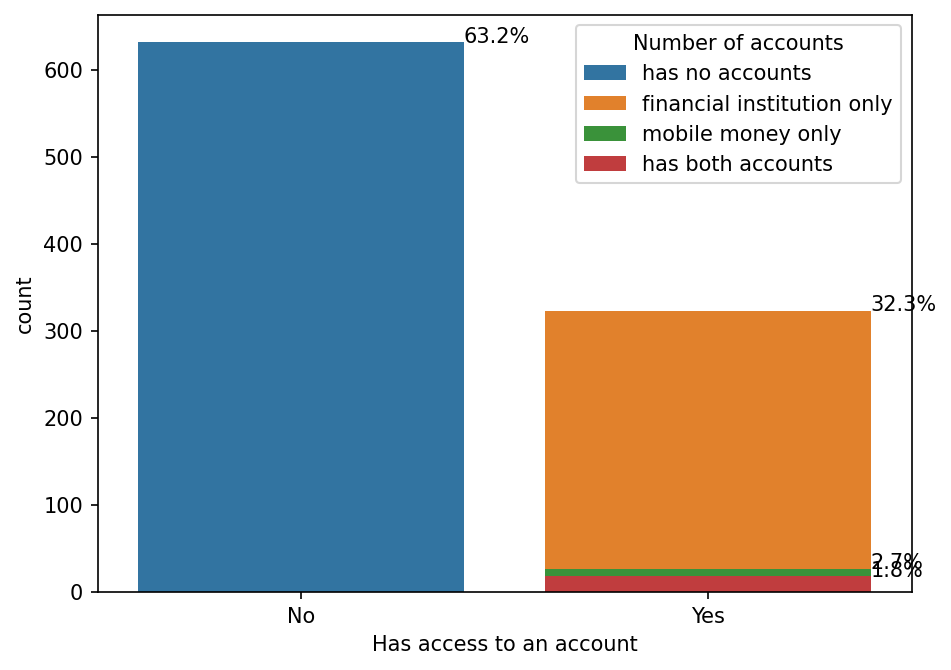

In [15]:
plt.figure(figsize=(7,5)  , dpi= 150)

ax = sns.countplot(data = subset_account, x ='account', 
              hue = 'Number of accounts',
              dodge = False)

ax.set(xlabel='Has access to an account', ylabel='count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(ph_data)))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='left')
plt.show()


In [16]:
subset_account.groupby('Number of accounts').count()

,wpid_random,account
Number of accounts,,
financial institution only,323,323
has both accounts,18,18
has no accounts,632,632
mobile money only,27,27


### reasons for opening their account

In [17]:
### which columns has data for reasons of first time account opening
# fin36 - Did you open this account in order to receive payments from this employer?

In [18]:
ph_data.groupby(['account', 'fin36']).count()['wpid_random']

account  fin36
1        1.00     37
         2.00      4
Name: wpid_random, dtype: int64

In [19]:
ph_data['fin36'].value_counts()

1.00    37
2.00     4
Name: fin36, dtype: int64

In [20]:
# how many are employed
ph_data['emp_in'].value_counts()

1.00    646
0.00    354
Name: emp_in, dtype: int64

In [21]:
# how many are employed and has first acct for employment
ph_data.groupby(['account','fin44']).count()['fin45']

account  fin44
1        2.00     0
Name: fin45, dtype: int64

In [22]:
def classify_firsts(x):    
    if x['fin35'] == 1 and x['fin36'] == 1:
        return 'for_employer'
    elif x['fin40'] == 1 and x['fin41'] == 1:
        return 'for_gov_pymnt'
    elif x['fin44'] == 1 and x['fin45'] == 1:
        return 'for_agri_sale'
    else:
        return 'not_first_acct'

In [23]:
ph_data['first_account'] = ph_data.apply(lambda x: classify_firsts(x) if x['account'] == 1 else 'no_account' , axis = 1)

C:\Users\Karen\AppData\Local\Temp\ipykernel_27172\3757148356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_data['first_account'] = ph_data.apply(lambda x: classify_firsts(x) if x['account'] == 1 else 'no_account' , axis = 1)


In [24]:
# Create a dictionary for mapping
first_class_mapping = {
    'for_employer': 'for employment',
    'for_gov_pymnt': 'receive government\npayment',
    'for_agri_sale': 'agricultural sale',
    'not_first_acct': 'not first account',
    0 : 'No',
    1 : 'Yes'
}

In [25]:
ph_data = ph_data.replace({'first_account':first_class_mapping})

In [26]:
## create a column o classify the reasons for first account opening
ph_data['first_account'].value_counts()

no_account                     632
not first account              317
for employment                  37
receive government\npayment     14
Name: first_account, dtype: int64

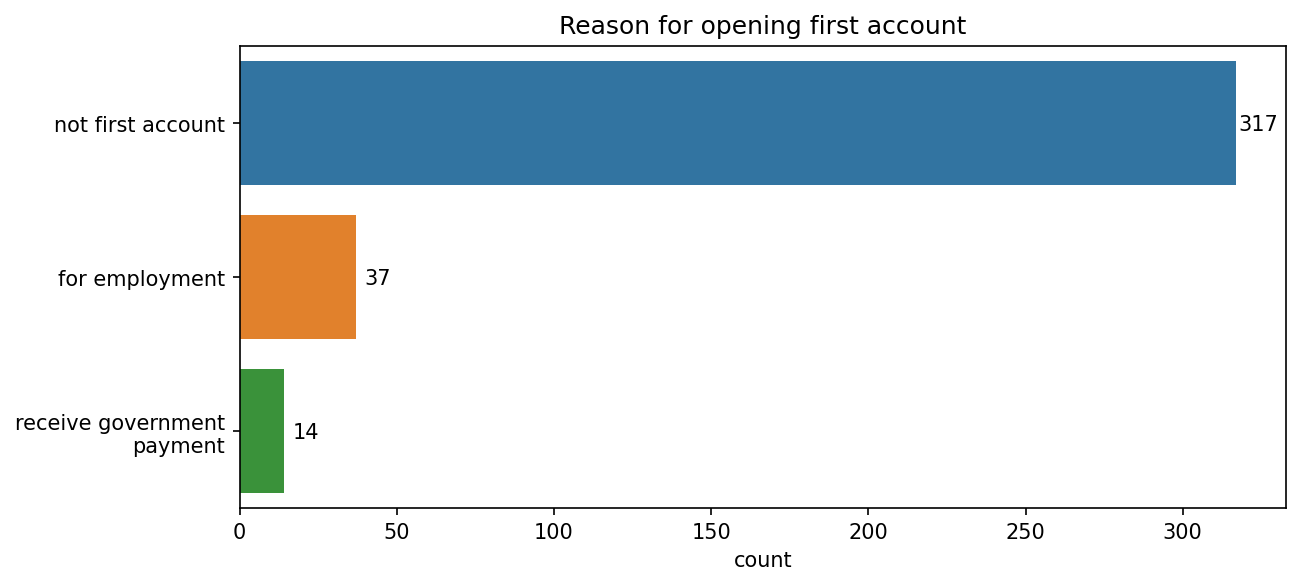

In [27]:
plt.figure(figsize=(9,4)  , dpi= 150)

ax = sns.countplot(data = ph_data[ph_data['first_account'] != 'no_account'], y ='first_account', orient = 'v',
              dodge = False)

ax.set(title='Reason for opening first account', xlabel='count', ylabel = '')

for p in ax.patches:
    percentage = p.get_width()#'{:.1f}%'.format(100 * p.get_width()/float(len(ph_data)))
    x = p.get_x() + p.get_width() + 7
    y = p.get_y() + 0.45
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### account activity

In [28]:
fin_activity = ph_data[['wpid_random', 'account', 'account_fin', 'Number of accounts', 'fin9', 'fin10']]

In [29]:
fin_activity

,wpid_random,account,account_fin,Number of accounts,fin9,fin10
114292,180129353,0,0,no_acct,NaN,NaN
114293,171987745,1,1,only_fin_acct,1.00,1.00
114294,178228576,1,1,only_fin_acct,1.00,1.00
114295,193725076,1,1,only_fin_acct,1.00,1.00
114296,194711242,1,1,only_fin_acct,1.00,1.00
...,...,...,...,...,...,...
115287,151988960,0,0,no_acct,NaN,NaN
115288,138300933,0,0,no_acct,NaN,NaN
115289,134514859,0,0,no_acct,NaN,NaN
115290,145841428,0,0,no_acct,NaN,NaN


In [ ]:
def is_active(x):    
    if x['fin9'] == 1 and x['fin10'] == 1 :
        return 1
    elif  x['fin9'] != 1and x['fin10'] == 1 :
        return 1
    elif  x['fin9'] == 1 and x['fin10'] != 1 :
        return 1
    elif  x['fin27a'] != 1 and x['fin27b'] != 1 and x['fin27c1'] != 1 and x['fin27c2'] == 1:
        return 'only_money_xfer'
    elif  x['fin27a'] != 1 and x['fin27b'] != 1 and x['fin27c1'] != 1 and x['fin27c2'] != 1:
        return 'no_local_remittance'
    else:
        return 'send_multiple_channels'

# ph_data['send_activity'] = ph_data.apply(lambda x: classify_send(x) , axis = 1)
# ph_data['send_activity'].value_counts()

In [152]:
# get overall activity
fin_activity['is_active'] = fin_activity.apply(
    lambda x: 1 if x['fin9'] == 1 and x['fin10'] == 1 else 0, 
    axis=1
)

C:\Users\Karen\AppData\Local\Temp\ipykernel_27172\3868576120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_activity['is_active'] = fin_activity.apply(


In [155]:
fin_activity.groupby(['account','is_active'])['wpid_random'].count()

account  is_active
0        0            632
1        0            167
         1            201
Name: wpid_random, dtype: int64

In [225]:
wide_fin = pd.melt(
    fin_activity,
    id_vars=['wpid_random', 'account', 'account_fin', 'Number of accounts'],
    value_vars=['fin9', 'fin10']
).reset_index()
wide_fin

,index,wpid_random,account,account_fin,Number of accounts,variable,value
0,0,180129353,0,0,no_acct,fin9,NaN
1,1,171987745,1,1,only_fin_acct,fin9,1.00
2,2,178228576,1,1,only_fin_acct,fin9,1.00
3,3,193725076,1,1,only_fin_acct,fin9,1.00
4,4,194711242,1,1,only_fin_acct,fin9,1.00
...,...,...,...,...,...,...,...
1995,1995,151988960,0,0,no_acct,fin10,NaN
1996,1996,138300933,0,0,no_acct,fin10,NaN
1997,1997,134514859,0,0,no_acct,fin10,NaN
1998,1998,145841428,0,0,no_acct,fin10,NaN


In [226]:
fin_group = wide_fin.groupby(['variable', 'value', 'account'])['wpid_random'].count().reset_index()
fin_group

,variable,value,account,wpid_random
0,fin10,1.00,1,225
1,fin10,2.00,1,90
2,fin10,4.00,1,1
3,fin9,1.00,1,236
4,fin9,2.00,1,78
5,fin9,3.00,1,2


In [227]:
wide_fin.groupby(['variable', 'account'])['wpid_random'].count().reset_index()

,variable,account,wpid_random
0,fin10,0,632
1,fin10,1,368
2,fin9,0,632
3,fin9,1,368


In [228]:
fin_mapping = {
    'fin9': 'Deposit',
    'fin10': 'Withdrawal',
    1 : 'Yes',
    2 : 'No',
    3 : 'Don\'t know',
    4 : 'Refused'
}

wide_fin = wide_fin.replace({'variable':fin_mapping})
wide_fin = wide_fin.replace({'value':fin_mapping})
wide_fin.rename(columns = {'value':'Had at least 1 transaction'}, inplace = True)
wide_fin

,index,wpid_random,account,account_fin,Number of accounts,variable,Had at least 1 transaction
0,0,180129353,0,0,no_acct,Deposit,NaN
1,1,171987745,1,1,only_fin_acct,Deposit,Yes
2,2,178228576,1,1,only_fin_acct,Deposit,Yes
3,3,193725076,1,1,only_fin_acct,Deposit,Yes
4,4,194711242,1,1,only_fin_acct,Deposit,Yes
...,...,...,...,...,...,...,...
1995,1995,151988960,0,0,no_acct,Withdrawal,NaN
1996,1996,138300933,0,0,no_acct,Withdrawal,NaN
1997,1997,134514859,0,0,no_acct,Withdrawal,NaN
1998,1998,145841428,0,0,no_acct,Withdrawal,NaN


<AxesSubplot:title={'center':'Account activity of those with bank accounts'}, xlabel='count', ylabel='transaction'>

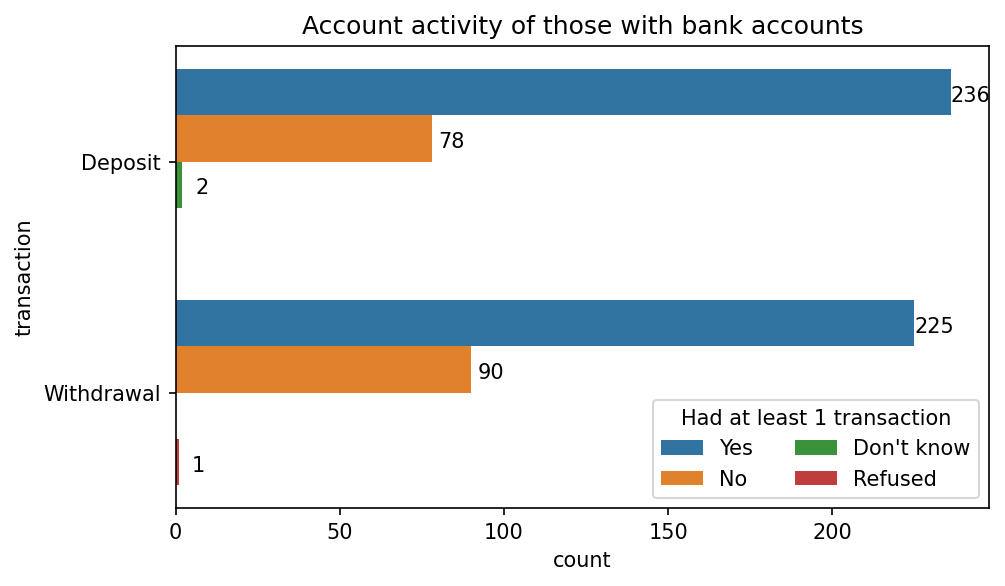

In [229]:
plt.figure(figsize=(7,4)  , dpi= 150)

ax = sns.countplot(data = wide_fin, y = 'variable', hue ='Had at least 1 transaction',
              dodge = True)

ax.set(title='Account activity of those with bank accounts', xlabel='count', ylabel = 'transaction')

for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_width().round(0))
    x = p.get_x() + p.get_width() + 6
    y = p.get_y() + 0.14
    ax.annotate(percentage, (x, y),ha='center')

sns.move_legend(ax, "lower right", ncol =2)
ax

In [230]:
wide_fin = wide_fin.replace({'Had at least 1 transaction':dupe_mapping})
wide_fin.groupby([ 'account_fin','Had at least 1 transaction', 'variable'])['wpid_random'].nunique().reset_index()

,account_fin,Had at least 1 transaction,variable,wpid_random
0,1,0.00,Deposit,80
1,1,0.00,Withdrawal,91
2,1,1.00,Deposit,236
3,1,1.00,Withdrawal,225


In [231]:
deposits = wide_fin[(wide_fin['Had at least 1 transaction'] == 1) & (wide_fin['variable'] == 'Deposit')]
deposits

,index,wpid_random,account,account_fin,Number of accounts,variable,Had at least 1 transaction
1,1,171987745,1,1,only_fin_acct,Deposit,1.00
2,2,178228576,1,1,only_fin_acct,Deposit,1.00
3,3,193725076,1,1,only_fin_acct,Deposit,1.00
4,4,194711242,1,1,only_fin_acct,Deposit,1.00
8,8,117611794,1,1,only_fin_acct,Deposit,1.00
...,...,...,...,...,...,...,...
973,973,125575464,1,1,only_fin_acct,Deposit,1.00
975,975,126724430,1,1,only_fin_acct,Deposit,1.00
976,976,200048966,1,1,only_fin_acct,Deposit,1.00
982,982,120836654,1,1,only_fin_acct,Deposit,1.00


In [232]:
withdrawals = wide_fin[(wide_fin['Had at least 1 transaction'] == 1) & (wide_fin['variable'] == 'Withdrawal')]
withdrawals

,index,wpid_random,account,account_fin,Number of accounts,variable,Had at least 1 transaction
1001,1001,171987745,1,1,only_fin_acct,Withdrawal,1.00
1002,1002,178228576,1,1,only_fin_acct,Withdrawal,1.00
1003,1003,193725076,1,1,only_fin_acct,Withdrawal,1.00
1004,1004,194711242,1,1,only_fin_acct,Withdrawal,1.00
1011,1011,132368001,1,1,only_fin_acct,Withdrawal,1.00
...,...,...,...,...,...,...,...
1972,1972,144193052,1,1,only_fin_acct,Withdrawal,1.00
1973,1973,125575464,1,1,only_fin_acct,Withdrawal,1.00
1976,1976,200048966,1,1,only_fin_acct,Withdrawal,1.00
1982,1982,120836654,1,1,only_fin_acct,Withdrawal,1.00


In [233]:
## get number of member with both deposits and withdrawals
deposits.merge(
    withdrawals,
    how='inner',
    on='wpid_random'
)

,index_x,wpid_random,account_x,account_fin_x,Number of accounts_x,variable_x,Had at least 1 transaction_x,index_y,account_y,account_fin_y,Number of accounts_y,variable_y,Had at least 1 transaction_y
0,1,171987745,1,1,only_fin_acct,Deposit,1.00,1001,1,1,only_fin_acct,Withdrawal,1.00
1,2,178228576,1,1,only_fin_acct,Deposit,1.00,1002,1,1,only_fin_acct,Withdrawal,1.00
2,3,193725076,1,1,only_fin_acct,Deposit,1.00,1003,1,1,only_fin_acct,Withdrawal,1.00
3,4,194711242,1,1,only_fin_acct,Deposit,1.00,1004,1,1,only_fin_acct,Withdrawal,1.00
4,11,132368001,1,1,only_fin_acct,Deposit,1.00,1011,1,1,only_fin_acct,Withdrawal,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,972,144193052,1,1,only_fin_acct,Deposit,1.00,1972,1,1,only_fin_acct,Withdrawal,1.00
197,973,125575464,1,1,only_fin_acct,Deposit,1.00,1973,1,1,only_fin_acct,Withdrawal,1.00
198,976,200048966,1,1,only_fin_acct,Deposit,1.00,1976,1,1,only_fin_acct,Withdrawal,1.00
199,982,120836654,1,1,only_fin_acct,Deposit,1.00,1982,1,1,only_fin_acct,Withdrawal,1.00


In [ ]:
## only 316 account holders answered this portion of the survey
## deposit = 24.68%
## withdrawals = 28.%

In [161]:
no_dupe = wide_fin[['wpid_random', 'Had at least 1 transaction']].drop_duplicates() 
no_dupe

,wpid_random,Had at least 1 transaction
0,180129353,NaN
1,171987745,Yes
2,178228576,Yes
3,193725076,Yes
4,194711242,Yes
...,...,...
1875,144713893,No
1934,126030641,No
1949,202414319,No
1959,198721196,Yes


In [202]:
dupe_ids = no_dupe[no_dupe['wpid_random'].duplicated(keep = False)]
dupe_ids.groupby('Had at least 1 transaction')['wpid_random'].count().reset_index()

,Had at least 1 transaction,wpid_random
0,Don't know,2
1,No,58
2,Refused,1
3,Yes,59


In [224]:
# create flag
dupe_mapping = {
    'Don\'t know': 0,
    'No': 0,
    'Yes': 1,
    'Refused': 0,
}

In [204]:
dupe_ids = dupe_ids.replace({'Had at least 1 transaction':dupe_mapping})

In [205]:
dupe_ids.groupby(['Had at least 1 transaction'])['wpid_random'].count().reset_index()

,Had at least 1 transaction,wpid_random
0,0,61
1,1,59


In [223]:
# dupe_ids[dupe_ids['Had at least 1 transaction'] == 1].drop_duplicates()

In [46]:
## summary of accounts
ph_data.groupby(['account', 'Number of accounts'])['wpid_random'].count().reset_index()

,account,Number of accounts,wpid_random
0,0,no_acct,632
1,1,has_both_acct,18
2,1,only_fin_acct,323
3,1,only_mob_acct,27


In [ ]:
## deposits in the past 12 months (personal, employer, institution, other persons)
ph_data.groupby(['emp_in', 'account', 'fin9'])['wpid_random'].count().reset_index()

In [ ]:
## withdrawals in the past 12 months (personal, employer, institution, other persons)
ph_data.groupby(['emp_in', 'account', 'fin10'])['wpid_random'].count().reset_index()

### mobile activity 

In [125]:
## mobile activity, used phone or internet for transaction
# n = 307
ph_data.groupby(['account', 'Number of accounts', 'fin5'])['wpid_random'].count().reset_index()

,account,Number of accounts,fin5,wpid_random
0,1,has_both_acct,1.00,13
1,1,has_both_acct,2.00,5
2,1,only_fin_acct,1.00,23
3,1,only_fin_acct,2.00,266


In [137]:
wide_mob = pd.melt(
    ph_data,
    id_vars=['wpid_random', 'account', 'account_fin', 'Number of accounts'],
    value_vars=['fin5']
).reset_index()
wide_mob

,index,wpid_random,account,account_fin,Number of accounts,variable,value
0,0,180129353,0,0,no_acct,fin5,NaN
1,1,171987745,1,1,only_fin_acct,fin5,2.00
2,2,178228576,1,1,only_fin_acct,fin5,2.00
3,3,193725076,1,1,only_fin_acct,fin5,2.00
4,4,194711242,1,1,only_fin_acct,fin5,2.00
...,...,...,...,...,...,...,...
995,995,151988960,0,0,no_acct,fin5,NaN
996,996,138300933,0,0,no_acct,fin5,NaN
997,997,134514859,0,0,no_acct,fin5,NaN
998,998,145841428,0,0,no_acct,fin5,NaN


In [140]:
mob_mapping = {
    'fin5': 'Mobile/internet services\nfor financial transactions',
    1 : 'Yes',
    2 : 'No'
}

wide_mob = wide_mob.replace({'variable':mob_mapping})
wide_mob = wide_mob.replace({'value':mob_mapping})
wide_mob.rename(columns = {'value':'Used service?'}, inplace = True)
wide_mob

,index,wpid_random,account,account_fin,Number of accounts,variable,Used service?
0,0,180129353,0,0,no_acct,Mobile/internet services\nfor financial transa...,NaN
1,1,171987745,1,1,only_fin_acct,Mobile/internet services\nfor financial transa...,No
2,2,178228576,1,1,only_fin_acct,Mobile/internet services\nfor financial transa...,No
3,3,193725076,1,1,only_fin_acct,Mobile/internet services\nfor financial transa...,No
4,4,194711242,1,1,only_fin_acct,Mobile/internet services\nfor financial transa...,No
...,...,...,...,...,...,...,...
995,995,151988960,0,0,no_acct,Mobile/internet services\nfor financial transa...,NaN
996,996,138300933,0,0,no_acct,Mobile/internet services\nfor financial transa...,NaN
997,997,134514859,0,0,no_acct,Mobile/internet services\nfor financial transa...,NaN
998,998,145841428,0,0,no_acct,Mobile/internet services\nfor financial transa...,NaN


<AxesSubplot:title={'center':'Mobile phone and internet usage'}, xlabel='count'>

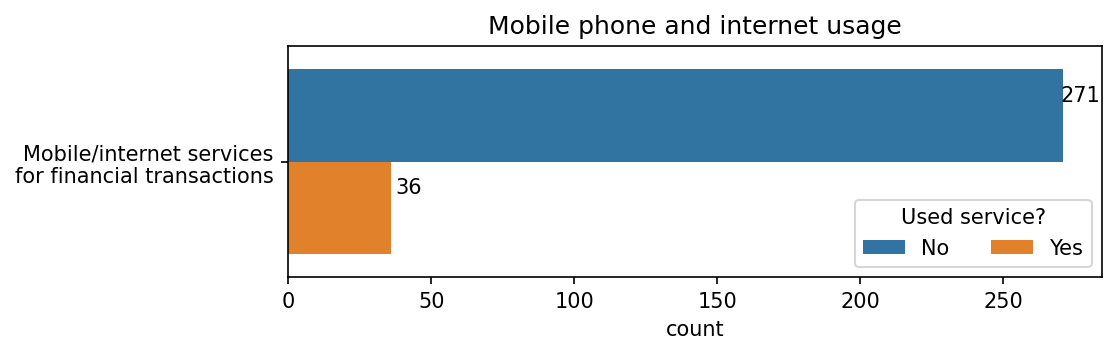

In [143]:
plt.figure(figsize=(7,2)  , dpi= 150)

ax = sns.countplot(data = wide_mob, y = 'variable', hue ='Used service?',
              dodge = True)

ax.set(title='Mobile phone and internet usage', xlabel='count', ylabel = '')

for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_width().round(0))
    x = p.get_x() + p.get_width() + 6
    y = p.get_y() + 0.14
    ax.annotate(percentage, (x, y),ha='center')

sns.move_legend(ax, "lower right", ncol =2)
ax

### sending money to family/friends witin the country

In [ ]:
# subset sending data
sending_subset = ph_data[['wpid_random','account', 'fin27a', 'fin27b', 'fin27c1', 'fin27c2']]

In [ ]:
def classify_send(x):    
    if x['fin27a'] == 1 and x['fin27b'] != 1 and x['fin27c1'] != 1 and x['fin27c2'] != 1:
        return 'only_formal_institution'
    elif  x['fin27a'] != 1 and x['fin27b'] == 1 and x['fin27c1'] != 1 and x['fin27c2'] != 1:
        return 'only_mobile'
    elif  x['fin27a'] != 1 and x['fin27b'] != 1 and x['fin27c1'] == 1 and x['fin27c2'] != 1:
        return 'only_in_person' 
    elif  x['fin27a'] != 1 and x['fin27b'] != 1 and x['fin27c1'] != 1 and x['fin27c2'] == 1:
        return 'only_money_xfer'
    elif  x['fin27a'] != 1 and x['fin27b'] != 1 and x['fin27c1'] != 1 and x['fin27c2'] != 1:
        return 'no_local_remittance'
    else:
        return 'send_multiple_channels'

ph_data['send_activity'] = ph_data.apply(lambda x: classify_send(x) , axis = 1)
ph_data['send_activity'].value_counts()

In [ ]:
# ph_data['send_activity'] = ph_data.apply(lambda x: classify_send(x) , axis = 1)
# ph_data['send_activity'].value_counts()

In [ ]:
grouped_send = ph_data.groupby(['account', 'send_activity'])['wpid_random'].count().reset_index()
grouped_send

In [ ]:
grouped_acct = ph_data.groupby(['account'])['wpid_random'].count().reset_index()
grouped_acct

In [ ]:
 grouped_data = grouped_send.merge(
    grouped_acct,
    how='left',
    on='account'
)

grouped_data

In [ ]:
grouped_data['%_send_activity_by_account']=100*(grouped_data['wpid_random_x']/grouped_data['wpid_random_y'])
grouped_data['%_send_activity_overall']=100*(grouped_data['wpid_random_x']/len(ph_data))
grouped_data

### receiving money to family/friends witin the country

In [ ]:
def classify_receive(x):    
    if x['fin29a'] == 1 and x['fin29b'] != 1 and x['fin29c1'] != 1 and x['fin29c2'] != 1:
        return 'only_formal_institution'
    elif  x['fin29a'] != 1 and x['fin29b'] == 1 and x['fin29c1'] != 1 and x['fin29c2'] != 1:
        return 'only_mobile'
    elif  x['fin29a'] != 1 and x['fin29b'] != 1 and x['fin29c1'] == 1 and x['fin29c2'] != 1:
        return 'only_in_person' 
    elif  x['fin29a'] != 1 and x['fin29b'] != 1 and x['fin29c1'] != 1 and x['fin29c2'] == 1:
        return 'only_money_xfer'
    elif  x['fin29a'] != 1 and x['fin29b'] != 1 and x['fin29c1'] != 1 and x['fin29c2'] != 1:
        return 'did_not_receive'
    else:
        return 'received_multiple_channels'

In [ ]:
ph_data['receive_activity'] = ph_data.apply(lambda x: classify_receive(x) , axis = 1)
ph_data['receive_activity'].value_counts()

In [ ]:
grouped_receive = ph_data.groupby(['account', 'receive_activity'])['wpid_random'].count().reset_index()
grouped_receive

In [ ]:
 grouped_data_rcv = grouped_receive.merge(
    grouped_acct,
    how='left',
    on='account'
)

grouped_data_rcv

In [ ]:
grouped_data_rcv['%_rcv_activity_by_account']=100*(grouped_data_rcv['wpid_random_x']/grouped_data_rcv['wpid_random_y'])
grouped_data_rcv['%_rcv_activity_overall']=100*(grouped_data_rcv['wpid_random_x']/len(ph_data))
grouped_data_rcv

In [ ]:
# Create a dictionary for mapping
rcv_mapping = {
    'did_not_receive': 'no remittances',
    'only_formal_institution': 'formal \ninstitutions',
    'only_mobile': 'mobile phone',
    'only_money_xfer': 'money transfer \nservice',
    'received_multiple_channels': 'multiple \nchannels',
    'only_in_person' : 'in person',
    0 : 'No',
    1 : 'Yes'
}

In [ ]:
grouped_data_rcv = grouped_data_rcv.replace({'receive_activity':rcv_mapping})
grouped_data_rcv = grouped_data_rcv.replace({'account':rcv_mapping})

In [ ]:
grouped_data_rcv['Has account'] = grouped_data_rcv['account']
grouped_data_rcv = grouped_data_rcv.sort_values(['account'],ascending=True)

In [ ]:
grouped_data_rcv

In [ ]:
plt.figure(figsize=(6,4)  , dpi= 150)
ax = sns.barplot(
    y = grouped_data_rcv['%_rcv_activity_overall'],
    x = grouped_data_rcv['receive_activity'],
    ci = None,
    hue = grouped_data_rcv['Has account']
)

ax.set(xlabel='Percentage(%) of respondents', ylabel='', title = 'How local remittances are received')

for container in ax.containers:
    ax.bar_label(container)
    
plt.xticks(rotation=45)
plt.show()